<a href="https://colab.research.google.com/github/ShareAndShine/Lemalabs/blob/main/Day_1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
path = '/gdrive/My Drive/Online_ML : Aug 2021/data/'

In [67]:
raw_data = pd.read_csv(path+'Chennai_house_univariate.csv');
raw_data.head()

,Size,Price
0,721.82,1480000
1,543.69,830000
2,851.72,2060000
3,931.02,2410000
4,552.77,860000


In [68]:
data = (raw_data - raw_data.mean()) / (raw_data.max() - raw_data.min())
data.head()

,Size,Price
0,-0.054820,-0.063773
1,-0.158528,-0.144922
2,0.020808,0.008636
3,0.066977,0.052331
4,-0.153242,-0.141177


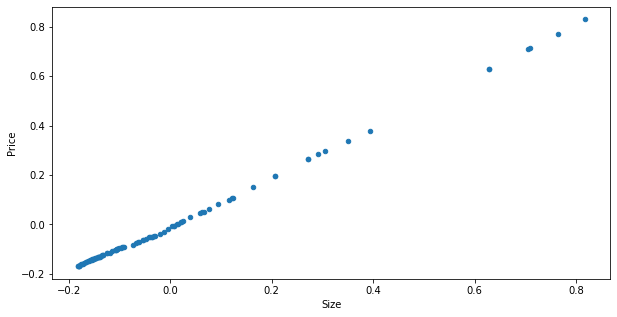

In [69]:
data.plot(kind='scatter', x='Size',y='Price',figsize=(10,5))

In [70]:
data.shape

(97, 2)

In [71]:
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


In [72]:
data.head()

,Ones,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


In [73]:
cols = data.shape[1] # gives you total column size. In our case raw data has  2 columns (size and prize)
#print(cols)
x = data.iloc[:, 0:cols-1] # scan all rows and column 1
y = data.iloc[:, cols-1:cols] #scan all rows and column 2

In [74]:
x = np.matrix(x) # create matrix for size
y = np.matrix(y) # create matrix for prize
theta = np.matrix([0,0]) 

In [75]:
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [76]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2) 
  return np.sum(inner)/(2 * len(x))

In [77]:
computeError(x,y,theta)

0.024346853685025285

In [99]:
learn_rate = 1 
iters = 150
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = theta.shape[1] 
  #print(x) # Raw data which contains size input in col 2 and in col 0 hard coded value of 1
  #print(y) # Raw data which contains prize output in col 1 
  #print(theta.T) # Raw data containing hardedcoded zeros 1 X 2 matrix
  #print(parameters) #refers to column in theta matrix (1 X 2) - O/P = 2
  cost = []
  for i in range(iters):
    #print(x*theta.T)
    error = (x * theta.T) -y 
    #print("Printing Error !!!!")
    #print(error) 
    for j in range(parameters):
      #print("I am inside j")
      #print(x[:,j])
      gradient = np.multiply(error, x[:,j])
      #print(gradient)
      temp[0,j] = theta[0,j] - ( (learn_rate/len(x)) * np.sum(gradient))
      #print(temp[0,j])
    
    theta = temp
    cost_iter = computeError(x,y,theta)
    cost.append(cost_iter)

  return theta, cost



In [100]:
new_theta,cost = gradientDescent(x,y,theta, learn_rate, iters)

In [101]:
print(new_theta)

[[2.72405237e-16 9.82955251e-01]]


In [103]:
print(cost)

[0.0219673183380595, 0.019820870807582117, 0.017884678934253863, 0.016138147087044627, 0.014562697083697286, 0.01314157057116722, 0.011859650763921774, 0.01070330164389687, 0.009660222911651065, 0.008719319145805603, 0.007870581778995266, 0.0071049826348863416, 0.006414377893795337, 0.005791421465372894, 0.005229486846882187, 0.0047225966358638285, 0.004265358947400457, 0.0038529100596397235, 0.0034808626774854535, 0.0031452592641283447, 0.0028425299439950274, 0.0025694545293213898, 0.002323128266419802, 0.0021009309372769366, 0.0019004989878101933, 0.0017197003863058103, 0.0015566119446032342, 0.0014094988607869883, 0.0012767962657778643, 0.0011570925775311307, 0.0010491144857772655, 0.0009517134075851379, 0.0008638532696729556, 0.0007845994875051558, 0.0007131090239438623, 0.0006486214217069421, 0.0005904507142432565, 0.0005379781289795985, 0.0004906455053223957, 0.00044794935740025273, 0.0004094355183916245, 0.0003746943094683421, 0.0003433561819661532, 0.0003150877864272378, 0.0002

In [108]:
model_price = x * new_theta.T
#print(model_price)

Text(0.5, 1.0, 'Final vs Training data')

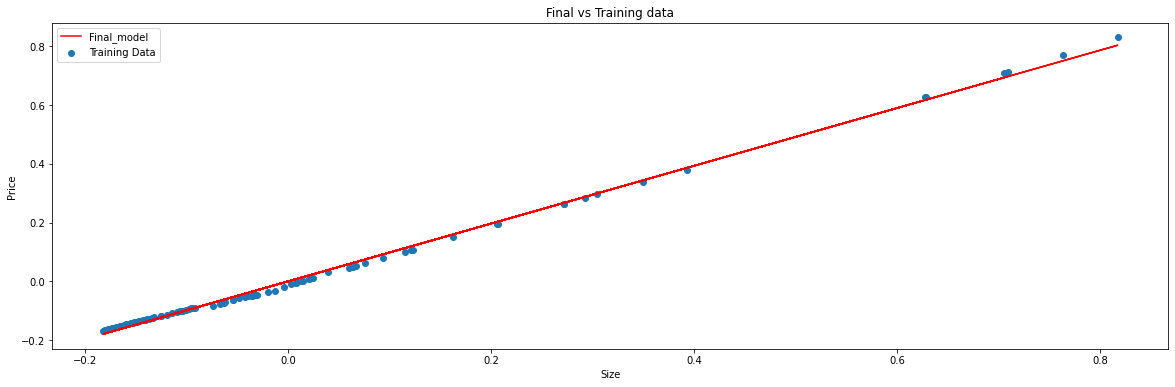

In [114]:
fig,ax = plt.subplots(figsize=(20,6))
ax.plot(data.Size,model_price,'r', label="Final_model")
#ax.plot(data.Size,data.Price,'b',label="Training Data")
ax.scatter(data.Size,data.Price, label="Training Data")
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Final vs Training data')